In [20]:
#!pip -q install plotly --upgrade

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [21]:
# Carrego o dataset
dataset_titanic = pd.read_csv("train.csv")

In [22]:
# Olho as 5 primeiras linhas
dataset_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# Pego as colunas do dataset
dataset_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
# Coloco a variável target pro final
dataset_titanic = pd.DataFrame(dataset_titanic, columns = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'])

In [25]:
# Olho os 5 primeiros registros
dataset_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [26]:
# Vejo a descrição do dataset
dataset_titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [27]:
# Vejo a quantidade de linhas do dataset
len(dataset_titanic)

891

In [28]:
# Verifico a quantidade de dados NaN que exite
dataset_titanic.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

### 1. Fazendo o tratamento dos dados


In [29]:
# Parece que não tem idade negativa
dataset_titanic[dataset_titanic['Age'] < 0].count()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

In [30]:
# Buscando a média das idades
media_idade = dataset_titanic['Age'].mean()
media_idade

29.69911764705882

In [31]:
# # Troco os valores NaN da idade pela média das idades
dataset_titanic["Age"].fillna(media_idade, inplace = True)

In [32]:
# Verifico se tem valores NaN na coluna idade
dataset_titanic.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

## Removendo a coluna "Cabin"

Essa coluna tem 687 registros NaN de 891 linhas do dataset, menos de 25% dos dados da coluna possuem registros que não são NaN. Logo, é preciso remover essa coluna.

In [33]:
# Removo a coluna
dataset_titanic = dataset_titanic.drop('Cabin', axis=1)

In [34]:
# Olho pro dataset para ver se a coluna foi removida
dataset_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [35]:
# Verificar o tamanho do dataset
len(dataset_titanic)

891

## Tratando os 2 registros NaN da coluna Embarked


In [36]:
dataset_titanic.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Survived       0
dtype: int64

In [37]:
# Procurando os dois valores nulos da coluna "Embarked"
dataset_titanic.loc[pd.isnull(dataset_titanic['Embarked'])]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,1
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,1


In [38]:
# Removendo os dois registros NaN
dataset_titanic.dropna(subset=['Embarked'], inplace=True)

In [39]:
# Verificando se os valores foram removidos
dataset_titanic.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

## 2. Fazendo a separação dos dados em treinamento e teste

In [40]:
# Vendo os dados
dataset_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [41]:
# Criando uma variável para armazenar os valores previsores
x_dataset_titanic = dataset_titanic.iloc[:, 1:10].values

x_dataset_titanic

array([[3, 'Braund, Mr. Owen Harris', 'male', ..., 'A/5 21171', 7.25,
        'S'],
       [1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
        'female', ..., 'PC 17599', 71.2833, 'C'],
       [3, 'Heikkinen, Miss. Laina', 'female', ..., 'STON/O2. 3101282',
        7.925, 'S'],
       ...,
       [3, 'Johnston, Miss. Catherine Helen "Carrie"', 'female', ...,
        'W./C. 6607', 23.45, 'S'],
       [1, 'Behr, Mr. Karl Howell', 'male', ..., '111369', 30.0, 'C'],
       [3, 'Dooley, Mr. Patrick', 'male', ..., '370376', 7.75, 'Q']],
      dtype=object)

In [42]:
# Criando uma variável para armazenar a
y_dataset_titanic = dataset_titanic.iloc[:,10]

y_dataset_titanic

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

## Tratando os dados categóricos

Os modelos de Machine Learning aceitam número para o treinamento e não strings, por isso que as strings da variável de treinamento devem ser tratadas. Será usado o LabelEncoder para isso.

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
# Vejo a primeira linha do dataset de treinamento
x_dataset_titanic[0]

array([3, 'Braund, Mr. Owen Harris', 'male', 22.0, 1, 0, 'A/5 21171',
       7.25, 'S'], dtype=object)

In [45]:
# label Encoder pro nome
label_encoder_nome = LabelEncoder()

nome = label_encoder_nome.fit_transform(x_dataset_titanic[:,1])

In [46]:
nome

array([108, 190, 353, 272,  15, 553, 514, 623, 411, 575, 726,  95, 728,
        28, 838, 359, 681, 865, 837, 511, 273,  80, 522, 764, 625,  44,
       240, 260, 604, 811, 826, 775, 289, 854, 534, 372, 504, 134, 835,
       588,   7, 825, 445, 455, 212, 696, 472, 603, 725,  38, 628, 593,
       333, 246, 619, 871, 706, 594, 851, 299, 748, 337, 754, 783, 559,
       595, 185,  25, 439, 395, 300, 376, 161,  87, 545, 777, 562, 127,
       223, 840, 736, 518, 141, 385,  52, 255, 763, 259, 149, 159,  31,
       150, 209, 184, 739, 292, 308, 219, 421, 655, 657, 856, 404, 312,
       541, 723, 558, 674, 551, 666, 880,  67, 416,  46, 644, 178, 824,
        70,  24, 362, 550, 574, 846, 855, 587, 524, 498, 652, 234, 225,
       165, 694, 849, 771, 684, 584, 271, 617, 282,  99, 596, 319, 116,
        32, 585,  29, 254, 579, 121,  68, 642, 531, 887, 611, 864, 287,
       181, 766, 715, 186, 845,  82, 129, 627, 293, 157, 759,  69, 485,
       830, 679, 407, 751, 768, 443, 463, 387, 320, 473, 716, 64

In [47]:
# Label Encoder para o gênero
label_encoder_genero = LabelEncoder()

genero = label_encoder_genero.fit_transform(x_dataset_titanic[:,2])

In [48]:
# Comparar essa coluna com a coluna com Label Encoder
x_dataset_titanic[:2, 2]

array(['male', 'female'], dtype=object)

In [49]:
genero[:2]

array([1, 0])

In [50]:
# Label Encoder para o Ticket

label_encoder_ticket = LabelEncoder()

ticket = label_encoder_ticket.fit_transform(x_dataset_titanic[:,6])

In [51]:
x_dataset_titanic[:10,6], ticket[:10]

(array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
        '330877', '17463', '349909', '347742', '237736'], dtype=object),
 array([522, 595, 668,  48, 471, 274,  84, 394, 343, 131]))

In [52]:
# Label Encoder para Embarked

label_encoder_embarked = LabelEncoder()

embarked = label_encoder_embarked.fit_transform(x_dataset_titanic[:, 8])

In [53]:
embarked[:10], x_dataset_titanic[:10, 8]

(array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0]),
 array(['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C'], dtype=object))

In [54]:
# Agora será feito a substituição dos dados categóricos pelos dados transformados

x_dataset_titanic[:, 1] = nome
x_dataset_titanic[:, 2] = genero
x_dataset_titanic[:, 6] = ticket
x_dataset_titanic[:, 8] = embarked

In [55]:
# Verificando se foi feito a alteração
x_dataset_titanic[:20,]

array([[3, 108, 1, 22.0, 1, 0, 522, 7.25, 2],
       [1, 190, 0, 38.0, 1, 0, 595, 71.2833, 0],
       [3, 353, 0, 26.0, 0, 0, 668, 7.925, 2],
       [1, 272, 0, 35.0, 1, 0, 48, 53.1, 2],
       [3, 15, 1, 35.0, 0, 0, 471, 8.05, 2],
       [3, 553, 1, 29.69911764705882, 0, 0, 274, 8.4583, 1],
       [1, 514, 1, 54.0, 0, 0, 84, 51.8625, 2],
       [3, 623, 1, 2.0, 3, 1, 394, 21.075, 2],
       [3, 411, 0, 27.0, 0, 2, 343, 11.1333, 2],
       [2, 575, 0, 14.0, 1, 0, 131, 30.0708, 0],
       [3, 726, 0, 4.0, 1, 1, 615, 16.7, 2],
       [1, 95, 0, 58.0, 0, 0, 37, 26.55, 2],
       [3, 728, 1, 20.0, 0, 0, 534, 8.05, 2],
       [3, 28, 1, 39.0, 1, 5, 332, 31.275, 2],
       [3, 838, 0, 14.0, 0, 0, 412, 7.8542, 2],
       [2, 359, 0, 55.0, 0, 0, 152, 16.0, 2],
       [3, 681, 1, 2.0, 4, 1, 479, 29.125, 1],
       [2, 865, 1, 29.69911764705882, 0, 0, 150, 13.0, 2],
       [3, 837, 0, 31.0, 1, 0, 300, 18.0, 2],
       [3, 511, 0, 29.69911764705882, 0, 0, 183, 7.225, 0]], dtype=object)

## 3. Fazendo o escalonamento dos dados

Números grandes influenciam muito em comparação com número pequenos, por causa disso o modelo pode achar que uma variável possa ser mais importante que a outra, não necessariamente é importante fazer o escalonamento, por isso será feito o treinamento com e escalonamento, nesse tópico será feito o escalonamento.

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
# Fazendo o escalonamento e atribuindo no dataset
scaler_x_dataset_titanic = StandardScaler()
x_dataset_titanic = scaler_x_dataset_titanic.fit_transform(x_dataset_titanic)

In [42]:
# Verificando o escalonamento
x_dataset_titanic

array([[ 0.82520863, -1.30926758,  0.73534203, ...,  0.91701764,
        -0.50023975,  0.58683958],
       [-1.57221121, -0.98974394, -1.35991138, ...,  1.28135338,
         0.78894661, -1.93955453],
       [ 0.82520863, -0.3545933 , -1.35991138, ...,  1.64568912,
        -0.48664993,  0.58683958],
       ...,
       [ 0.82520863, -0.12469215, -1.35991138, ...,  1.67563453,
        -0.17408416,  0.58683958],
       [-1.57221121, -1.41447658,  0.73534203, ..., -1.64830528,
        -0.0422126 , -1.93955453],
       [ 0.82520863, -0.87284505,  0.73534203, ...,  0.6325363 ,
        -0.49017322, -0.67635748]])

In [43]:
y_dataset_titanic

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

## 4. Dividindo o dataset em treinamento e teste para o modelo

In [44]:
from sklearn.model_selection import train_test_split

In [50]:
# Separando o dataset em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x_dataset_titanic, y_dataset_titanic, test_size=0.3, random_state=0)

In [51]:
x_treino.shape, y_treino.shape

((622, 9), (622,))

In [52]:
x_teste.shape, y_teste.shape

((267, 9), (267,))

## 4.1 Salvar os datasets de treino e teste

Para não rodar várias vezes e ter separação diferentes, será usado a biblioteca pickle para salvar os dados e os usar depois para o treinamento

In [53]:
import pickle

In [54]:
# Cria arquivos e salva os dados
with open("titanic.pkl", mode='wb') as f:
    pickle.dump([x_treino, x_teste, y_treino, y_teste], f)

## 5. Usando o algoritmo Naive Bayes para o aprendizado de máquina

In [2]:
from sklearn.naive_bayes import GaussianNB
import pickle

Essa biblioteca é onde está o Naive Bayes, um dos algortimos que será usado nesse notebook

Como os datasets foram salvos como arquivo pkl, então será necessário abri-lo.

In [3]:
# Abrindo o arquivo
with open("titanic.pkl", 'rb') as f:
    x_treino, x_teste, y_treino, y_teste = pickle.load(f)

In [4]:
# Verificando as formas dos dados de treino
x_treino.shape, y_treino.shape

((622, 9), (622,))

In [6]:
# Verificando as formaas dos dados de teste
x_teste.shape, y_teste.shape

((267, 9), (267,))

In [7]:
# Fazendo o treinamento
naive_bayes_titanic = GaussianNB()

# Passo os dados de treino para a função 
naive_bayes_titanic.fit(x_treino, y_treino)

GaussianNB()

In [8]:
# Fazendo as previsões 
previsoes = naive_bayes_titanic.predict(x_teste)
previsoes

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [9]:
# trazendo o y_teste para comparação
y_teste

14     0
159    0
763    1
741    0
483    1
      ..
620    0
821    1
65     1
884    0
52     1
Name: Survived, Length: 267, dtype: int64

## 6. Verificando a precisão do modelo usando o Naive Bayes

In [17]:
# Verificando a acurácia (acerto) do modelo
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste, previsoes)

0.7677902621722846

In [12]:
#!pip -q install yellowbrick
# para baixar a biblioteca yellowbrick

In [13]:
# Gerando uma matrix de confusão para o entendimento dos dados
from yellowbrick.classifier import ConfusionMatrix

0.7677902621722846

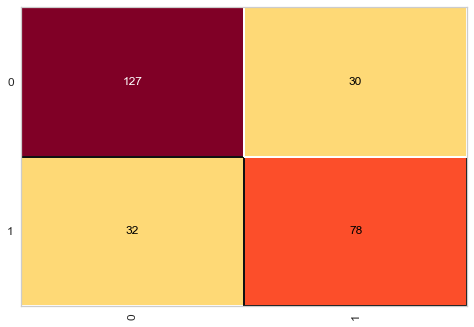

In [15]:
cm = ConfusionMatrix(naive_bayes_titanic)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [19]:
print(classification_report(y_teste, previsoes))

# 0 é não e 1 é sim

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       157
           1       0.72      0.71      0.72       110

    accuracy                           0.77       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.77      0.77      0.77       267



## 7. Resultados - Naive Bayes - 76.78%

Com o algoritmo de Naive Bayes foi possível fazer a previsões e obter cerca de 76.78% de precisão, é uma porcentagem razoavelmente boa, mas ainda dá para melhorar com outros algortimos

## Testando o algoritmo sem o escalonamento dos dados

Agora será feito o treinamento do modelo sem fazer o escalonamento.

### Dividindo os dados em treino e teste

In [56]:
from sklearn.model_selection import train_test_split

In [58]:
# Separando o dataset em treino e teste
x_treino_v2, x_teste_v2, y_treino_v2, y_teste_v2 = train_test_split(x_dataset_titanic, y_dataset_titanic, test_size=0.3, random_state=0)

In [60]:
# Verificando as formas dos dados de treino
x_treino_v2.shape, y_treino_v2.shape

((622, 9), (622,))

In [61]:
# Verificando as formas dos dados de teste
x_teste_v2.shape, y_teste_v2.shape

((267, 9), (267,))

### Salvando os dados de treino e teste

In [62]:
import pickle

In [63]:
with open("titanicSemEscalonamento.pkl", 'wb') as f:
    pickle.dump([x_treino_v2, x_teste_v2, y_treino_v2, y_teste_v2], f)

### Utilizando o Naive Bayes novamente para o treinamento

In [64]:
import pickle
from sklearn.naive_bayes import GaussianNB

In [65]:
# Pegando os arquivos salvos
with open("titanicSemEscalonamento.pkl", 'rb') as f:
    X_treino_v2, X_teste_v2, Y_treino_v2, Y_teste_v2 = pickle.load(f)

In [66]:
X_treino_v2.shape, Y_treino_v2.shape

((622, 9), (622,))

In [67]:
X_teste_v2.shape, Y_teste_v2.shape

((267, 9), (267,))

In [68]:
# Fazendo o treinamento
naive_titanic_sem_escalonamento = GaussianNB()
naive_titanic_sem_escalonamento.fit(X_treino_v2, Y_treino_v2)

GaussianNB()

In [69]:
# Fazendo a previsão
previsoes_v2 = naive_titanic_sem_escalonamento.predict(X_teste_v2)
previsoes

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [70]:
# Comparando com o resultado
Y_teste_v2

14     0
159    0
763    1
741    0
483    1
      ..
620    0
821    1
65     1
884    0
52     1
Name: Survived, Length: 267, dtype: int64

### Verificando os resultados

In [76]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [77]:
# Verificando a precisão
accuracy_score(Y_teste_v2, previsoes_v2)

0.7715355805243446

0.7715355805243446

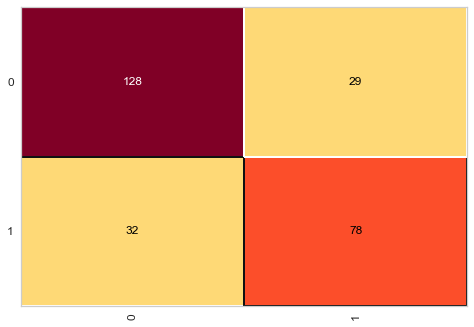

In [80]:
# Criando a matrix de confusão
cm_v2 = ConfusionMatrix(naive_titanic_sem_escalonamento)
cm_v2.fit(X_treino_v2, Y_treino_v2)
cm_v2.score(X_teste_v2, Y_teste_v2)

In [83]:
print(classification_report(Y_teste_v2, previsoes_v2))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       157
           1       0.73      0.71      0.72       110

    accuracy                           0.77       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.77      0.77      0.77       267



# Resultados finais com o Naive Bayes

Os resultados obtidos com e sem escalonameto rendeu uma previsão acima de 75%, mas ainda dá para melhorar esse percentual usando outros algoritmos.

#### Com escalonamento
O percentual de precisão foi de 76.78% onde ele conseguiu identificar 81% das pessoas que não sobreviveram e acertou 80%, errando 30 registros, enquanto 71% foi das pessoas que sobreviveram e o algoritmo acertou 72%, errando 32 registros.

#### Sem escalonamento
O percentual de precisão foi de 77.15%, obtendo um melhoramento de aproximadamente 1%. Ele conseguiu identificar 82% das pessoas que não sobreviveram e acertou 80%, errando 29 registros, enquanto 71% ele conseguiu identificar que sobreviveram e o algoritmo acertou 73%, errando 32 registros.